In [37]:
import pandas as pd
import glob

import numpy as np

csvxls_files=glob.glob('/home/build_fp/km_intersection/*.csv.gz')

db=pd.read_csv(csvxls_files[0])
#db1=db.group_by(['gn'])['bp_circle_id'].size()

#grpd = df.groupby(['A','B']).size()
#db1
db1 = db.groupby(['gn']).size().reset_index()
db1.columns=['gn','bd']
db1['bd'].max()



#lst = range(50)
csv_list=np.array_split(csvxls_files, 10)
len(csv_list[0])

28

In [35]:
edf=pd.read_csv('/home/ea_1km_grid_index_ea_country_boundary.csv')


In [36]:
edf1=edf[['uidx','GID_0','lon','lat']]
edf1

,uidx,GID_0,lon,lat
0,237524-n00e030_dem,KEN,34.754583,4.764583
1,236524-n00e030_dem,KEN,34.734583,4.764583
2,236023-n00e030_dem,KEN,34.724583,4.774583
3,236523-n00e030_dem,KEN,34.734583,4.774583
4,237023-n00e030_dem,KEN,34.744583,4.774583
...,...,...,...,...
5148866,174641-s15e035_dem,TZA,38.494583,-11.405417
5148867,172641-s15e035_dem,TZA,38.454583,-11.405417
5148868,173141-s15e035_dem,TZA,38.464583,-11.405417
5148869,174141-s15e035_dem,TZA,38.484583,-11.405417


In [54]:
import ntpath


for idx,csvxls_files in enumerate(csv_list[0:1]):
    db1_cont=[]
    for csvfl in csvxls_files:
        flname=ntpath.basename(csvfl)
        if 'part' in flname:
            #print(flname)
            flname_bits=flname.split('_')[1:3]
            grid_name='_'.join(flname_bits)
            #print(grid_name)
        else:
            flname_bits=flname.split('_')[0:2]
            grid_name='_'.join(flname_bits)
            #print(grid_name)
        db=pd.read_csv(csvfl)
        db1 = db.groupby(['gn']).size().reset_index()
        db1.columns=['gn','bd']
        #db1['grid_name']=grid_name
        db1['uidx']=db1["gn"].astype(str) + '-'+ grid_name
        db2=pd.merge(db1,edf1,on='uidx')
        db1_cont.append(db2)
        #del [db1,db2,db]
    pdb=pd.concat(db1_cont)
    #db.to_csv(f'/home/build_fp/km_intersection_part_{idx}.csv.gz',compression='gzip',index=False)
    #del [db]

In [55]:
db2.info()
db2['id']=np.arange(0,len(db2.index))
#aa=pdb.groupby(by=["uidx",'id'])['bd'].sum()
aa=pdb.groupby(by=["uidx"])['bd'].sum()
aa2=aa.reset_index()
aa2.info()
#db3=db2.drop_duplicates('uidx')
#db3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 0 to 249999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   gn      250000 non-null  int64  
 1   bd      250000 non-null  int64  
 2   uidx    250000 non-null  object 
 3   GID_0   250000 non-null  object 
 4   lon     250000 non-null  float64
 5   lat     250000 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 13.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2911368 entries, 0 to 2911367
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   uidx    object
 1   bd      int64 
dtypes: int64(1), object(1)
memory usage: 44.4+ MB


In [4]:
edf['uidx']=edf["gn"].astype(str) + '-' +edf["grid_name"]

In [2]:
import pandas as pd
db=pd.read_csv('/home/build_fp/km_intersection_part_0.csv.gz')
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5335602 entries, 0 to 5335601
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   gn      int64  
 1   bd      int64  
 2   uidx    object 
 3   GID_0   object 
 4   lon     float64
 5   lat     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 244.2+ MB


In [5]:
import numpy as np

part_list=np.arange(0,10)


for pl in part_list[0:1]:
    db=pd.read_csv(f'/home/build_fp/km_intersection_part_{pl}.csv.gz')
    aa=db.groupby(by="uidx")['bd'].sum()
    bb=db.join(aa,lsuffix='_new',how='right')
    bb1=bb[['uidx','GID_0','lat','lon','bd_new']]

In [25]:
aa=db.groupby(by="uidx")['bd'].sum()
#bb=db.join(aa,lsuffix='_new',how='right')
aa1=aa.reset_index()
aa2=aa1.drop_duplicates('uidx')
aa2.columns=['uidx','new_bd']

In [34]:
aa1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2911368 entries, 0 to 2911367
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   uidx    object
 1   bd      int64 
dtypes: int64(1), object(1)
memory usage: 44.4+ MB


In [33]:
bb=pd.merge(aa2,db,on='uidx',how='right')
bb1=bb[bb['new_bd'].notnull()]
bb1

,uidx,new_bd,gn,bd,GID_0,lon,lat
0,300-n20e030_dem,1,300,1,SDN,30.004583,22.004583
1,301-n20e030_dem,1,301,1,SDN,30.004583,21.994583
2,302-n20e030_dem,1,302,1,SDN,30.004583,21.984583
3,303-n20e030_dem,1,303,1,SDN,30.004583,21.974583
4,304-n20e030_dem,1,304,1,SDN,30.004583,21.964583
...,...,...,...,...,...,...,...
5335597,249996-n05e035_dem,3,249996,1,ETH,39.994583,5.044583
5335598,249997-n05e035_dem,3,249997,1,ETH,39.994583,5.034583
5335599,249998-n05e035_dem,3,249998,1,ETH,39.994583,5.024583
5335600,249999-n05e035_dem,3,249999,1,ETH,39.994583,5.014583


In [20]:
bb1=bb.drop_duplicates('uidx')
bb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2911368 entries, 1-n00e030_dem to 99999-s10e035_dem
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   gn      float64
 1   bd_new  float64
 2   uidx    object 
 3   GID_0   object 
 4   lon     float64
 5   lat     float64
 6   bd      int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 242.2+ MB


In [11]:
import glob


csvfls = glob.glob('/home/build_fp/*.csv.gz')


for csvfl in csvfls[0:1]:
    db=pd.read_csv(csvfl)
    db1=db[['GID_0','bd','lan','lat']]
    
    

In [13]:
db

,gn,bd,uidx,GID_0,lon,lat
0,1,101,1-s10e030_dem,TZA,30.004583,-5.005417
1,2,1,2-s10e030_dem,TZA,30.004583,-5.015417
2,3,1,3-s10e030_dem,TZA,30.004583,-5.025417
3,4,1,4-s10e030_dem,TZA,30.004583,-5.035417
4,5,1,5-s10e030_dem,TZA,30.004583,-5.045417
...,...,...,...,...,...,...
5239548,249996,1,249996-s05e030_dem,TZA,34.994583,-4.955417
5239549,249997,1,249997-s05e030_dem,TZA,34.994583,-4.965417
5239550,249998,1,249998-s05e030_dem,TZA,34.994583,-4.975417
5239551,249999,1,249999-s05e030_dem,TZA,34.994583,-4.985417


## Issue in oraganizing the part csv.zg file, so grouping the csv file into group forms 

In [94]:
import pandas as pd
import glob

import numpy as np

csvxls_files=glob.glob('/home/build_fp/km_intersection/*.csv.gz')


cont_gn=[]
cont_path=[]
for csvfl in csvxls_files:
    flname=ntpath.basename(csvfl)
    if 'part' in flname:
        #print(flname)
        flname_bits=flname.split('_')[1:3]
        grid_name='_'.join(flname_bits)
        #print(grid_name)
    else:
        flname_bits=flname.split('_')[0:2]
        grid_name='_'.join(flname_bits)
        #print(grid_name)
    cont_gn.append(grid_name)
    cont_path.append(csvfl)

In [95]:
db=pd.DataFrame()
db['grid_name']=cont_gn
db['path']=cont_path

grid_groups=db.groupby('grid_name')['path'].apply(list).to_dict()

In [97]:
#grid_groups
db1=db.drop_duplicates('grid_name')
grid_dict_list=db1['grid_name']


for idx,gr_dict in enumerate(grid_dict_list):
    print(gr_dict)
    grid_csv_list=grid_groups[gr_dict]
    yui_cont=[]
    for gcsv in grid_csv_list:
        yui=pd.read_csv(gcsv)
        yui_cont.append(yui)
    yc=pd.concat(yui_cont)
    yc1=yc.groupby('gn')['bp_circle_idx'].size()
    yc2=yc1.reset_index()
    if not yc2.empty:
        yc2.to_csv(f'/home/build_fp/count_buildings/{gr_dict}.csv.gz',compression='gzip',index=False)
        print(idx)

n20e030_dem
0
n00e030_dem
1
n05e035_dem
2
n00e045_dem
3
s05e030_dem
4
n15e030_dem
5
n10e030_dem
6
n00e035_dem
7
s05e035_dem
8
n10e045_dem
9
s05e025_dem
10
n10e035_dem
11
s15e030_dem
12
s10e030_dem
13
s10e035_dem
14
n05e040_dem
15
n05e020_dem
16
n10e020_dem
17
n20e025_dem
18
n15e035_dem
19
n10e025_dem
20
n05e030_dem
21
n00e025_dem
22
s10e025_dem
23
n15e025_dem
24
n10e040_dem
25
s15e040_dem
26
n00e040_dem
27
s15e035_dem
28
n10e050_dem
29
n05e050_dem
30
n05e045_dem
31
n20e035_dem
32
n05e025_dem
33
s05e040_dem
34


In [99]:
yc1=yc.groupby('gn')['bp_circle_idx'].size()
yc2=yc1.reset_index()
#yc2['bp_circle_idx'].describe()
yc2['bp_circle_idx'].min()
#yc2

1

In [71]:
import geopandas as gp

grid_db=gp.read_file('/home/ea-ibf-climada/exposure/ea_5x5_grid.shp')

grid_db= grid_db.rename(columns={'dem_name': 'grid_name'})
grid_db1=pd.merge(grid_db,db,on='grid_name',how='left')

In [74]:
grid_db2=grid_db1.drop_duplicates('grid_name')
grid_db2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 38 entries, 0 to 278
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sno        38 non-null     int64   
 1   grid_name  38 non-null     object  
 2   geometry   38 non-null     geometry
 3   path       35 non-null     object  
dtypes: geometry(1), int64(1), object(2)
memory usage: 1.5+ KB


In [76]:
grid_db2.to_file('/home/test_grid.shp')

In [88]:
db=pd.read_csv('/home/build_fp/km_intersection/s15e035_dem_189_buildings.csv.gz')

db['bp_circle_idx'].min()

0.0

In [90]:
yc['bp_circle_idx'].max()

504719.0

## summarize grid wise

In [2]:
import glob
import ntpath
import pandas as pd

csvfls = glob.glob('/home/build_fp/count_buildings/*.csv.gz')

#for csfl in csvfls:
#flname=ntpath.basename(csvfls[0])
#flname.split('.')[0]

edf=pd.read_csv('/home/ea_1km_grid_index_ea_country_boundary.csv')

cont_er=[]
for csfl in csvfls:
    flname=ntpath.basename(csfl)
    gridname=flname.split('.')[0]
    db=pd.read_csv(f'/home/build_fp/count_buildings/{flname}')
    db.columns=['gno','bp_circle_idx']
    edf1=edf[edf['grid_name']==gridname]
    er=pd.merge(db,edf1,on='gno')
    er1=er[['bp_circle_idx','lon','lat','GID_0']]
    er2=er1[er1['bp_circle_idx'].notnull()]
    cont_er.append(er2)

In [3]:
cont_er1=pd.concat(cont_er)
cont_er1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5091410 entries, 0 to 54435
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   bp_circle_idx  int64  
 1   lon            float64
 2   lat            float64
 3   GID_0          object 
dtypes: float64(2), int64(1), object(1)
memory usage: 194.2+ MB


In [9]:
dfg=cont_er1.groupby(['GID_0']).sum()
dfg1=dfg.append(dfg.sum().rename('Total'))
dfg1

/tmp/ipykernel_50/2738375104.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfg1=dfg.append(dfg.sum().rename('Total'))


,bp_circle_idx,lon,lat
GID_0,,,
BDI,3226741.0,6.552527e+05,-7.381034e+04
DJI,275989.0,7.902237e+05,2.177148e+05
ERI,1969144.0,3.892442e+06,1.541289e+06
ETH,43786374.0,3.678982e+07,8.011247e+06
KEN,31328823.0,1.802974e+07,2.634169e+05
RWA,5900683.0,6.146019e+05,-4.108417e+04
SDN,33306562.0,4.612851e+07,2.443425e+07
SOM,4598333.0,2.378328e+07,3.146197e+06
SSD,3688440.0,1.560254e+07,3.750026e+06


In [11]:
#dfg=cont_er1.groupby(['GID_0']).sum()

dfg1['Total Number of Buildings'] = (dfg1['bp_circle_idx'].astype(float)/1000000).round(2).astype(str) + 'MM'

dfg1['Country']=['Burundi',
 'Djibouti',
 'Eritrea',
 'Ethiopia',
 'Kenya',
 'Rwanda',
 'Sudan',
 'Somalia',
 'South Sudan',
 'Tanzania',
 'Uganda','East Africa']

dfg2=dfg1[['Country','Total Number of Buildings']]
dfg2

,Country,Total Number of Buildings
GID_0,,
BDI,Burundi,3.23MM
DJI,Djibouti,0.28MM
ERI,Eritrea,1.97MM
ETH,Ethiopia,43.79MM
KEN,Kenya,31.33MM
RWA,Rwanda,5.9MM
SDN,Sudan,33.31MM
SOM,Somalia,4.6MM
SSD,South Sudan,3.69MM


In [2]:
import pandas as pd

db=pd.read_csv('/home/build_fp/count_buildings/n00e025_dem.csv.gz')
db

,gn,bp_circle_idx
0,1,7
1,2,7
2,3,8
3,4,7
4,5,7
...,...,...
249995,249996,8
249996,249997,27
249997,249998,19
249998,249999,9


In [3]:
edf=pd.read_csv('/home/ea_1km_grid_index_ea_country_boundary.csv')
edf

,GID_0,COUNTRY,gno,Nomotorway,primary,secondary,tertiary,unclassified,lon,lat,grid_name,uidx
0,KEN,Kenya,237524,NaN,NaN,NaN,NaN,NaN,34.754583,4.764583,n00e030_dem,237524-n00e030_dem
1,KEN,Kenya,236524,NaN,NaN,NaN,NaN,NaN,34.734583,4.764583,n00e030_dem,236524-n00e030_dem
2,KEN,Kenya,236023,NaN,NaN,NaN,NaN,NaN,34.724583,4.774583,n00e030_dem,236023-n00e030_dem
3,KEN,Kenya,236523,NaN,NaN,NaN,NaN,NaN,34.734583,4.774583,n00e030_dem,236523-n00e030_dem
4,KEN,Kenya,237023,NaN,NaN,NaN,NaN,NaN,34.744583,4.774583,n00e030_dem,237023-n00e030_dem
...,...,...,...,...,...,...,...,...,...,...,...,...
5148866,TZA,Tanzania,174641,NaN,NaN,NaN,NaN,NaN,38.494583,-11.405417,s15e035_dem,174641-s15e035_dem
5148867,TZA,Tanzania,172641,NaN,NaN,NaN,NaN,NaN,38.454583,-11.405417,s15e035_dem,172641-s15e035_dem
5148868,TZA,Tanzania,173141,NaN,NaN,NaN,NaN,NaN,38.464583,-11.405417,s15e035_dem,173141-s15e035_dem
5148869,TZA,Tanzania,174141,NaN,NaN,NaN,NaN,NaN,38.484583,-11.405417,s15e035_dem,174141-s15e035_dem


In [27]:
cont_er1.columns=['value','longitude','latitude','gid']

edf=cont_er1[['value','longitude','latitude']]
edf['value'].min(),edf['value'].max()

(1, 18266)

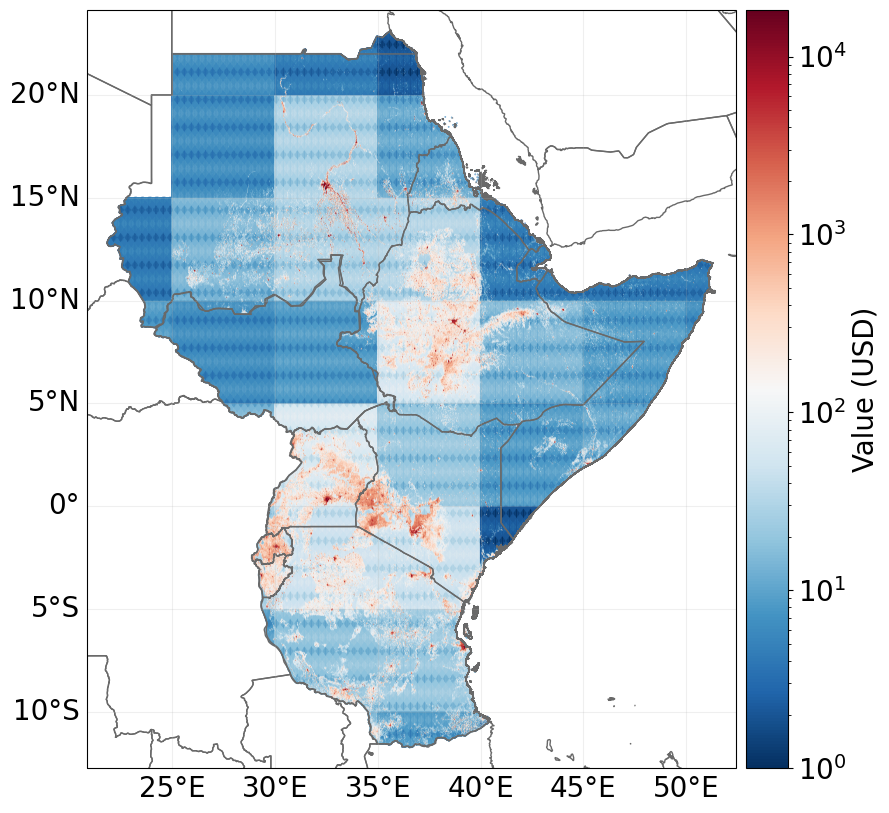

In [31]:
from climada.entity import Exposures
from matplotlib import colors
from matplotlib import pyplot as plt

new_exp = Exposures(edf)
new_exp.check()

norm = colors.LogNorm(vmin=1, vmax=18266)

ax=new_exp.plot_hexbin(norm=norm, pop_name=False, cmap='RdBu_r', buffer=1)

#fname='/home/ea_shapefiles/ea_ghcf_icpac.shp'

#ax.add_geometries(Reader(fname).geometries(),ccrs.PlateCarree(),facecolor='None')

plt.savefig('/home/build_fp.png', bbox_inches='tight')